### Basic curve fitting ( for over and under determined systems)

* Curve fitting is most basic of regression technique. Polynomial and Exponential (**after linearizing**) fitting resulting in solutions that come in 
    the form of  the solving a linear system of equations:

$\hspace{1 cm} A x = b$ 

* For the over determined system of equations (i.e. typicaly there is no soluton x s.t. $Ax =b $), the optimization problem is given by:

$\hspace{1 cm } arg_x min (||Ax -b||_2 + \lambda g(x))$ and 

* For under-determined system of equations(i.e. there are inifinitly many solutions x for $Ax = b$), the optimization problem is given by:

$\hspace{1 cm} arg_x min \hspace{.1 cm} g(x)$ subject to $||Ax -b||_2 \leq \epsilon$

* For over and under determined system of equations, which can result either no or an infinite number of solutions, a choice of constraint or penelty, which is also known as regularization, must be made in order to produce a solution 

* For the non-linear system of equations the above two optimization problems can be written as:

$\hspace{1 cm } arg_x min (f(A,x,b) + \lambda g(x))$ or 

$\hspace{1 cm} arg_x min \hspace{.1 cm} g(x)$ subject to $f(A,x,b) \leq \epsilon$

* The non -linear equations are often solved using gradeint descent algorithms. 

* In addition to optimization stratergies, a central concern in data science is understanding if a proposed model overfit or underfit the data. The cross validation stratergies are critical for evaluating any propesed model 



### Basic curve fitting procedure with different error matrices

1. Classic curve fitting: One can consider this as the general relationship between independent variable (X), dependent variable (Y) and some unknown paraaters $\beta$:

$\hspace{1 cm} Y = f(X,\beta)$, where, fucntion $f$ is typically prescribed and the parameters $\beta$ are found by optimizing the $\textit{goodness of fit}$ of the function to data


2. Various error matrices can be minimized when approximating with a function $f(x)$, the choice of error metric is critiical in determining the type of the solution

$\hspace{1 cm} E_{\infty} = max_{1 \lt k \lt k} |f(x_k) - y_k|$, maximum error($l_{\infty}$) 

$\hspace{1 cm} E_1 = \frac{1}{n} \sum_{k=1}^n |f(x_k) - y_k| $, mean absolute error ($l_l$)

$\hspace{1 cm} E_2 = (\frac{1}{n} \sum_{k=1}^n |f(x_k) - y_k|^2)^{1/2} $, least square error ($l_2$)



#### $\hspace{0.25 cm}$ Ex 01: Without outliers

Optimization terminated successfully.
         Current function value: 0.230040
         Iterations: 59
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 1.385764
         Iterations: 56
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.288000
         Iterations: 54
         Function evaluations: 102


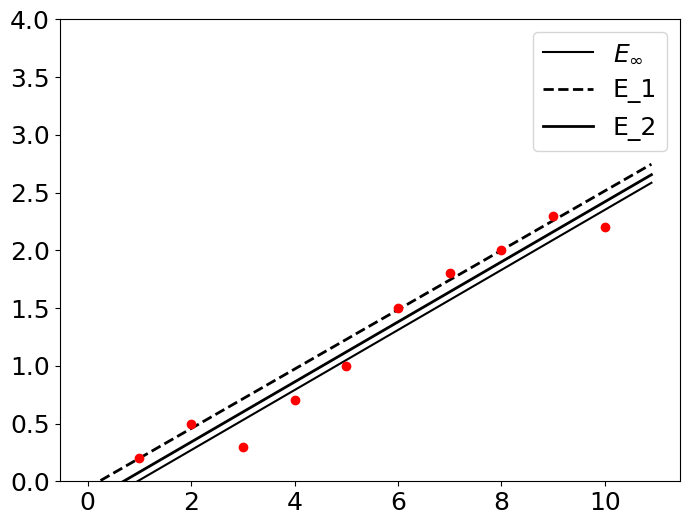

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy.optimize import fmin
from matplotlib import rcParams

# l_infty norm: x0 is parameters (that we are going to optimize) and t = (X,y)
def fit1(x0,t):
    x,y = t 
    return np.max(np.abs(x0[0]*x + x0[1] -y))

# l_1 norm 
def fit2(x0,t):
    x,y = t 
    return np.sum(np.abs(x0[0]*x + x0[1]-y))

# l_2 norm 
def fit3(x0,t):
    x,y = t 
    return np.sum(np.power(np.abs(x0[0]*x + x0[1] -y),2))

# data without outlier 
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)

# use scipy.optimize.fmin function to find the best parameters 
x0 = np.array([1.0,1.0])         # initial parameters estimate 
p1 = fmin(fit1,x0,args=(t,))     # optimize using l_infty error 
p2 = fmin(fit2,x0,args=(t,))     # optimize using l_1 eroor 
p3 = fmin(fit3,x0,args=(t,))     # optimize using l_2 error 

xf = np.arange(0,11,0.1)         # x axis data for polynomial func 
y1 = np.polyval(p1,xf)           # create a polynomial using the optimized parameters 
y2 = np.polyval(p2,xf)           # Ex. of np.opyval function: np.polyval([3,0,1], 5)  # 3 * 5**2 + 0 * 5**1 + 1
y3 = np.polyval(p3,xf)

# plot the data without outlier 
plt.figure()
plt.plot(xf,y1,color='k',label='$E_\infty$')
plt.plot(xf,y2,'--',color='k',linewidth=2,label='E_1')
plt.plot(xf,y3,color='k',linewidth=2,label='E_2')
plt.plot(x,y,'o',color='r',linewidth=2)

plt.ylim(0,4)
plt.legend()
plt.show()


#### $\hspace{0.25 cm}$ Ex 02: With outliers

Optimization terminated successfully.
         Current function value: 1.464330
         Iterations: 52
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 3.640022
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 6.234182
         Iterations: 49
         Function evaluations: 92


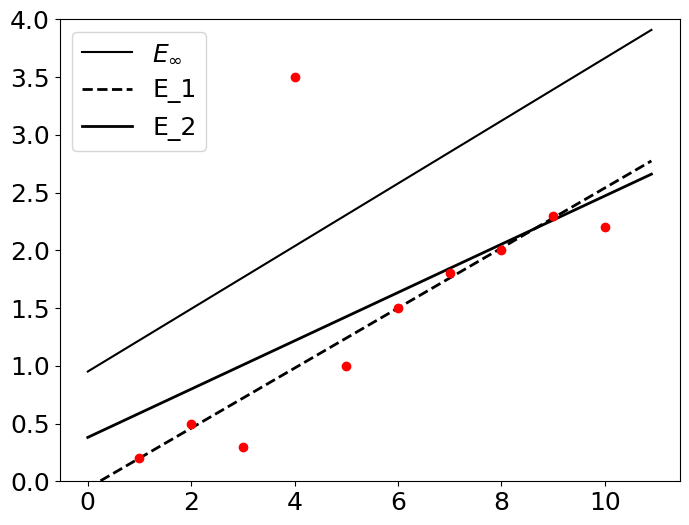

In [57]:
# data with outlier, here you will see that L_1 norm is less susceptibale to the outliers(robust)

x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,3.5,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)

x0 = np.array([1,1])
p1 = fmin(fit1,x0,args=(t,));
p2 = fmin(fit2,x0,args=(t,));
p3 = fmin(fit3,x0,args=(t,));

xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)

plt.figure()
plt.plot(xf,y1,color='k',label='$E_\infty$')
plt.plot(xf,y2,'--',color='k',linewidth=2,label='E_1')
plt.plot(xf,y3,color='k',linewidth=2,label='E_2')
plt.plot(x,y,'o',color='r',linewidth=2)

plt.ylim(0,4)
plt.legend()
plt.show()

### Under-determined linear system of equations
* $arg_x min \hspace{.1 cm} g(x)$ subject to $||Ax -b||_2 \leq \epsilon$
* We are trying to solve for 1. $||x||_2$ subject to $||Ax -b||_2 \leq \epsilon$ and 2. $|x|_1$ subject to $||Ax -b||_2 \leq \epsilon$

In [63]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import minimize
from scipy.optimize import fmin 

# underdtermined system of equations -> infinite no of soultions

n = 20 
m = 100 

A = np.random.rand(n,m)  # create 20*100 random matrix [short-fat matrix]
b = np.random.rand(n)    # random matrix with 20 elements [ no of equations(m) < no of unknowns(n)] 

def two_norm(x):         # this find the L2 norm of matrix x 
    return np.linalg.norm(x,ord=2)

constr = ({'type':'eq','fun':lambda x: A@x -b})
x0 = np.random.rand(m)   # initial x values, we are solving for x in Ax = b 
res = minimize(two_norm,x0,method='SLSQP',constraints=constr)

x2 = res.x               # L2 norm solution of x 

def one_norm(x):         # L1 norm of x 
    return np.linalg.norm(x,ord=1)

res = minimize(one_norm,x0,method='SLSQP',constraints=constr)
x1 = res.x               # L1 norm solution of x (this promotes the sparsity)

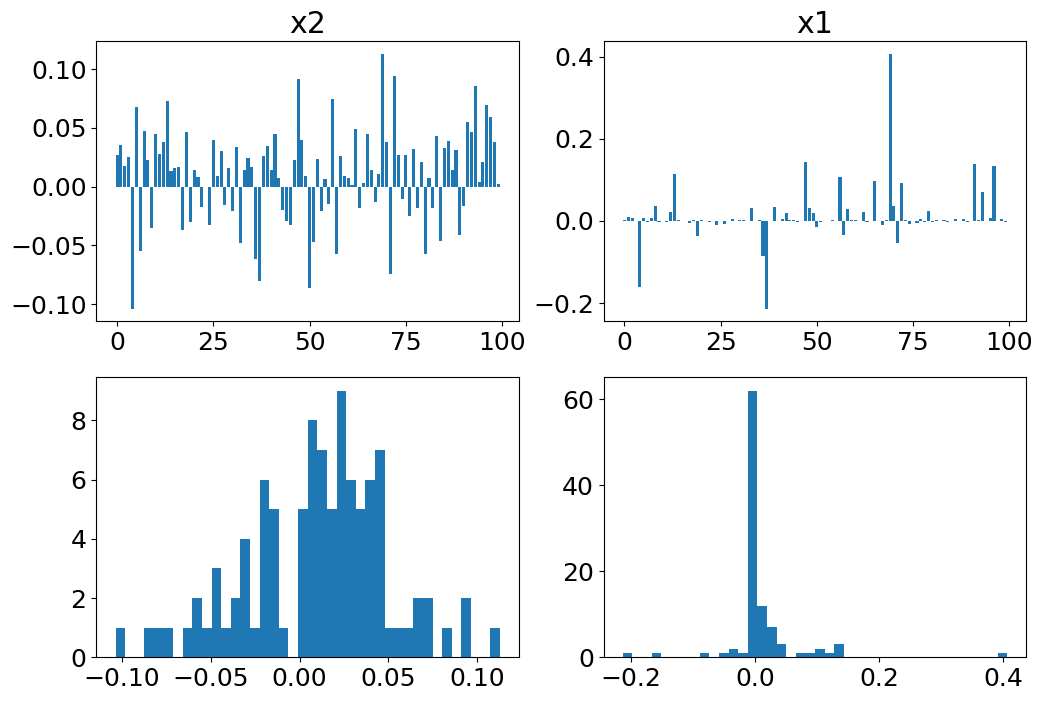

In [64]:
# plot the data

plt.rcParams['figure.figsize'] = [12, 8]
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].bar(range(m),x2)
axs[0].set_title('x2')
axs[1].bar(range(m),x1)
axs[1].set_title('x1')

axs[2].hist(x2,40)
axs[3].hist(x1,40)


plt.show()

### Over-determined linear system of equations

* In general we are trying to solve for $arg_x min (||Ax -b||_2 + \lambda g(x))$
* For this specific example, we want to solve $arg_x min (||Ax -b||_2 + \lambda |x|_1)$
* So by increasing $\lambda$ we can increase the sparsity

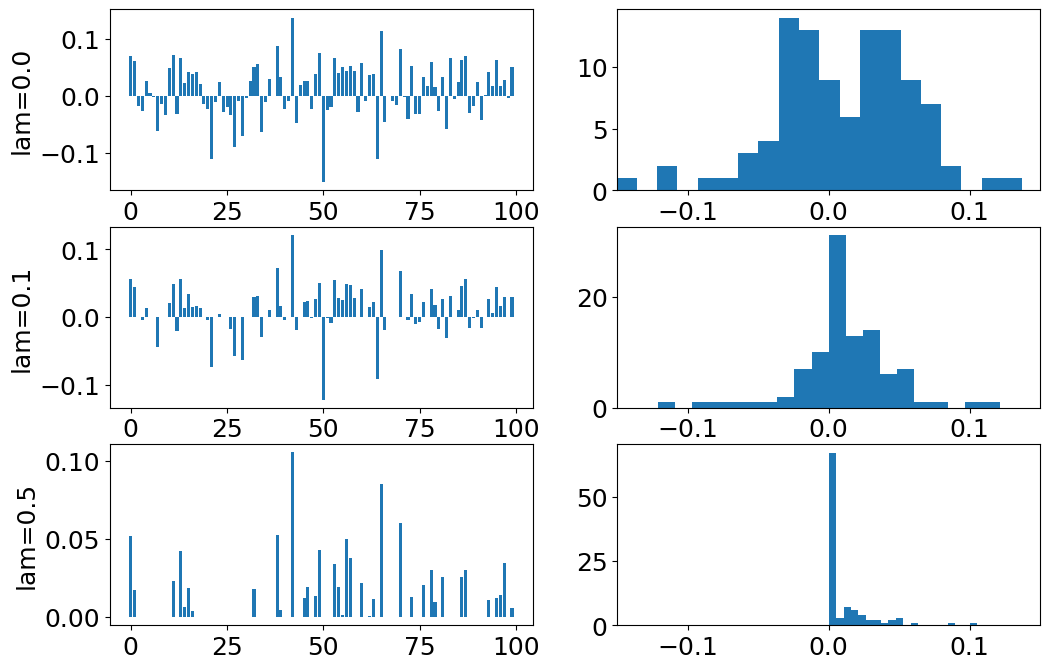

In [65]:
# overdetermined systems -> Genrally has no solution 

n = 500
m = 100

A = np.random.rand(n,m) # tall skinny matrix 
b = np.random.rand(n)   # no of equations (n) is larger than the no of variables (m) 

x0 = np.linalg.pinv(A) @ b    # initialize with least sqaure solution from p-inverse 

lam = np.array([0,0.1,0.5])   # regularization parameters (according to the below optimization problem this promotes the sparsity)

def reg_norm(x,lam):
    return np.linalg.norm(A@x - b,ord=2) + lam * np.linalg.norm(x,ord=1)

fig,axs = plt.subplots(len(lam),2)

for j in range(len(lam)):
    res = minimize(reg_norm,x0,args=(lam[j]))
    x = res.x
    axs[j,0].bar(range(m),x)
    axs[j,0].set_ylabel('lam='+str(lam[j]))
    axs[j,1].hist(x,20)
    axs[j,1].set_xlim(-0.15,0.15)

### Non linear regression and Gradient descent 

* Polynomial and exponential curve fitting admit analytically tractable, best fit least squares solutions 

* Fitting non-linear function of the form, for ex. $f(x)=\beta_1 cos(\beta_2 x + \beta_3) + \beta_4$ to the data set leads to a system of non-linear equations.

* The root mean square is then defined as, $E_2(\beta) = \sum_{k=1}^n (f(x_k,\beta) - y_k)^2$ and can be minimized with respect to each paramter $\beta_j\\$
$\hspace{1cm} \frac{\partial E_2}{\partial \beta_j} = 0$ for j = 0,1,2,..m and gives a set of non-linear set of equations: $\sum_{k=1}^n (f(x_k,\beta)-y_k) \frac{\partial f}{\partial \beta_j} = 0 $ for j = 0,1,2,.. m


* Gradient descent: At the extremums of multi-dimentional fucntion $f(x)$, the gradient must be zero i.e. $ \nabla E(\beta) = 0: \\$
$\hspace{1cm} \beta_{k+1}(\delta) = \beta_k - \delta \nabla E(\beta_k) \rightarrow$ move one step along the steepest gradient (simulataniously update all the parameters $\beta$), where $\delta$ is the learning rate 


### Ex: gradient descent using fmin

In [58]:
# computing the gradient descent using fmin 

import scipy.interpolate as intplt
h = 0.1 
x = np.arange(-6,6,h)
y = np.arange(-6,6,h)

X,Y = np.meshgrid(x,y)

# create dataset with two gaussians 

F1 = 1.5 -1.6*np.exp(-0.05*(3*np.power(X+3,2) + np.power(Y+3,2)))   # F1 = exp(-0.05(x+3)^2 + (y+3)^2)
# The below fucntion is used for the gradient descent  
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))     # F = A1 exp(-0.05(x+3)^2 + (y+3)^2) + A2 exp(-0.1(x+3)^2 + (y+3)^2)

# please refer examples: https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
dFy,dFx = np.gradient(F,h,h)                                        # find the gradient of F along x and y directions 

# creating the splines for function F and its derrivatives dF/dx and dF/dy, [derrivative of a smooth fucntion is easy]

F_interp   = intplt.RectBivariateSpline(x,y,F)                      # create an interpolate spline for F 
dFx_interp = intplt.RectBivariateSpline(x,y,dFx)                    # 2D interpolate spline of dF/dx
dFy_interp = intplt.RectBivariateSpline(x,y,dFy)                    # 2D interpolate spline of dF/dy

# gradeint descent 

x0 = np.array([4,0,-5])  # initial values for x 
y0 = np.array([0,-5,2])  # initial values for y 

#  Helper function to find the best learning rate,lr (del), by minimizing F
def delsearch(lr, t):
    x,y,dfx,dfy = t 
    x_f = x - lr*dfx
    y_f = y -lr*dfy
    return F_interp(x_f,y_f) 

# do three gradient descents (based on the three initial values)
for jj in range(3):                                             
    x = np.zeros(20)
    y = np.zeros(20)
    f = np.zeros(20)

    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0],y[0])
    
    dfx = dFx_interp(x[0],y[0])
    dfy = dFy_interp(x[0],y[0])
    # for more detail about fmin: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html
    for j in range(len(x)-1):
        t = x[j],y[j],dfx,dfy                         
        lr = fmin(delsearch,0.1,args=(t,),disp=False) # get the lr that minimize the F 
        x[j+1] = x[j] -lr*dfx
        y[j+1] = y[j] -lr*dfy 
        f[j+1] = F_interp(x[j+1],y[j+1])

        dfx = dFx_interp(x[j+1],y[j+1])
        dFy = dFy_interp(x[j+1],y[j+1])

        if np.abs(f[j+1] -f[j]) < 1e-5:
            x = x[:j+2]
            y = y[:j+2]
            f = f[:j+2]
            break 

    if jj ==0:
        x1 = x
        y1 = y
        f1 = f

    if jj == 1:
        x2 = x
        y2 = y
        f2 = f

    if jj == 2:
        x3 = x
        y3 = y
        f3 = f


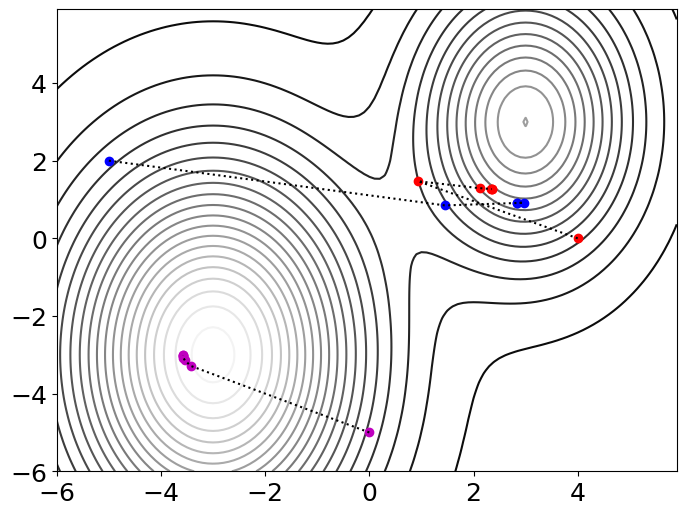

In [59]:
# plot the descent for three trials 

rcParams['figure.figsize'] = [8, 6]
plt.figure()
plt.contour(X,Y,F-1,20,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

### Model validation

* The coefficients are found by the regression and optimization is discussed above. The goal here is to discover the best model for given the data  

* However, we need to develop techniques which allow us to objectively select a good model for fitting data (i.e. should one use cubic or quadratic fit?)

* The error matrix alone doesn't dictate a good model selection as more terms that are chosen for fitting, the more parameters are available for lowering the error, 
regardless of whether the additional terms have meaning or interpretability

### Ex: A Model variability with noise in data

* Here, we are fitting 20 degree polynomial to data using the least square method 

* You can see that the model coefficients varies a lot for different (but small) noise realizations

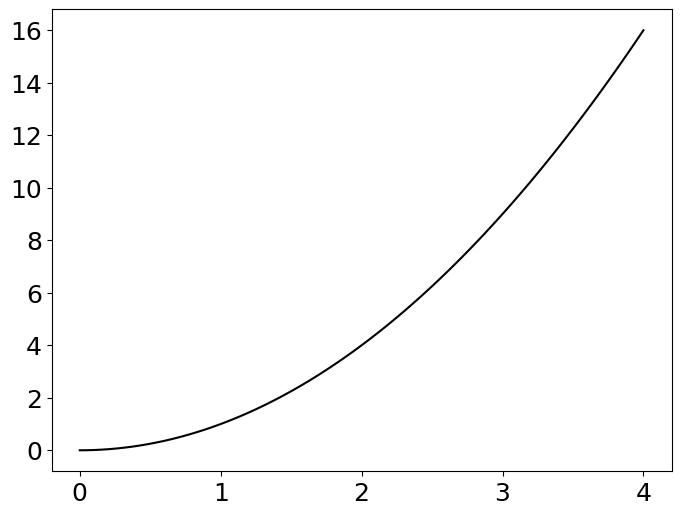

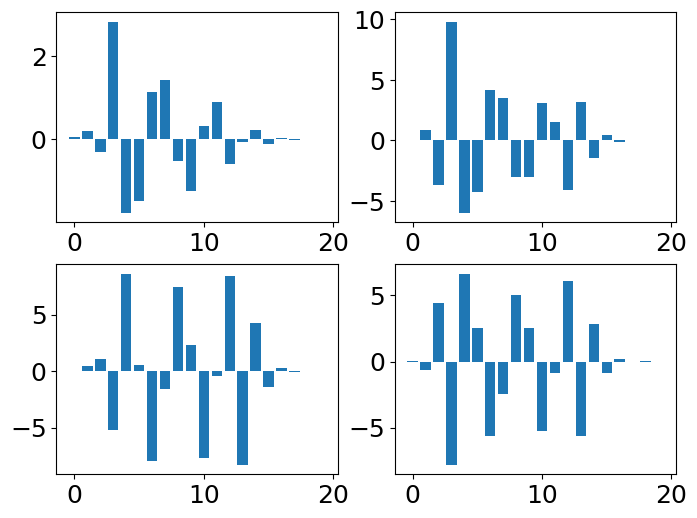

In [75]:
n = 100
L = 4 
x = np.linspace(0,L,n)
f = np.power(x,2)            # parabola with 100 data points 

M = 20                       # polynomial degree
 
# library of polynomial fuctions
phi = np.zeros((n,M))         
for j in range(M):
    phi[:,j] = np.power(x,j)

# plot 
rcParams['figure.figsize'] = [8, 6]
plt.figure()
plt.plot(x,f,color='k')
plt.xlabel('x')
plt.ylabel('f(x)')

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

# create 4 different noise realization and do the least square fit 
for j in range(4):
    fn = np.power(x,2) + 0.1 * np.random.rand(*x.shape)              # parabola with a white noise 
    an = np.linalg.pinv(phi) @ fn                                    # find the polynomial coeff. 
    fna = phi @ an                                                   # reconstructed polynomial using the coeff. 
    En = np.linalg.norm(fna-fn,ord=2)/np.linalg.norm(fn,ord=2)       # find the error 
    axs[j].bar(range(len(an)),an)

plt.show()                                                           # as you can see even with tiny error the polynomial loading have larger varient 

### Ex: Use different models to fit the same data

* Here we are using 100 different nose realizations with each model (to see variability within each model)

* As you can see some models has large variability (for ex. p-inverse and least square method)

* Additionally, different models has different loadings (or coefficients of polynomial terms)

* As you can see in the last plot all the methods produces small error values (even though the way it chooses loadings are different)

* This suggests that using the error alone as a metric for model selection is potentially problematic since almost any model can produce a reliable low error model.

In [ ]:
# different regression types 

from sklearn import  linear_model

N = 5                       # no of different regression methods 
k = 100                     # no of different error realizations 
E = np.zeros((N,k))         # error matrix 
M = 20                      # polynomail degree 
A = np.zeros((N,M,k))       # matrix of loading 
n = 100
x = np.linspace(0,L,100)    

lam = 0.1

phi = np.zeros((n,M))        # library of polynomial fuctions 
for j in range(M):
    phi[:,j] = np.power(x,j)


for jj in range(k):
    f = np.power(x,2) + 0.2 * np.random.rand(n)       # parabola with noise 

    a1 = np.linalg.pinv(phi) @ f                      # use p-inverse 
    f1 = phi @ a1 
    E[0][jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
    A[0,:,jj] = a1

    a2 = np.linalg.lstsq(phi,f,rcond=None)[0]         # least sqaure 
    f2 = phi @ a2 
    E[1][jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
    A[1,:,jj] = a2

    regr3 = linear_model.ElasticNet(alpha=0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr3.fit(phi, f)  
    a3 = regr3.coef_
    f3 = phi @ a3
    E[2][jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
    A[2,:,jj] = a3

    regr4 = linear_model.ElasticNet(alpha=0.8, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr4.fit(phi, f)  
    a4 = regr4.coef_
    f4 = phi @ a4
    E[3][jj] = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)
    A[3,:,jj] = a4

    ridge = linear_model.Ridge(alpha=1.0).fit(phi,f) # ridge 
    a5 = ridge.coef_
    f5 = phi @ a5
    E[4][jj] = np.linalg.norm(f-f5,ord=2)/np.linalg.norm(f,ord=2)
    A[4,:,jj] = a5

Text(0.5, 1.0, 'error of 5 methods')

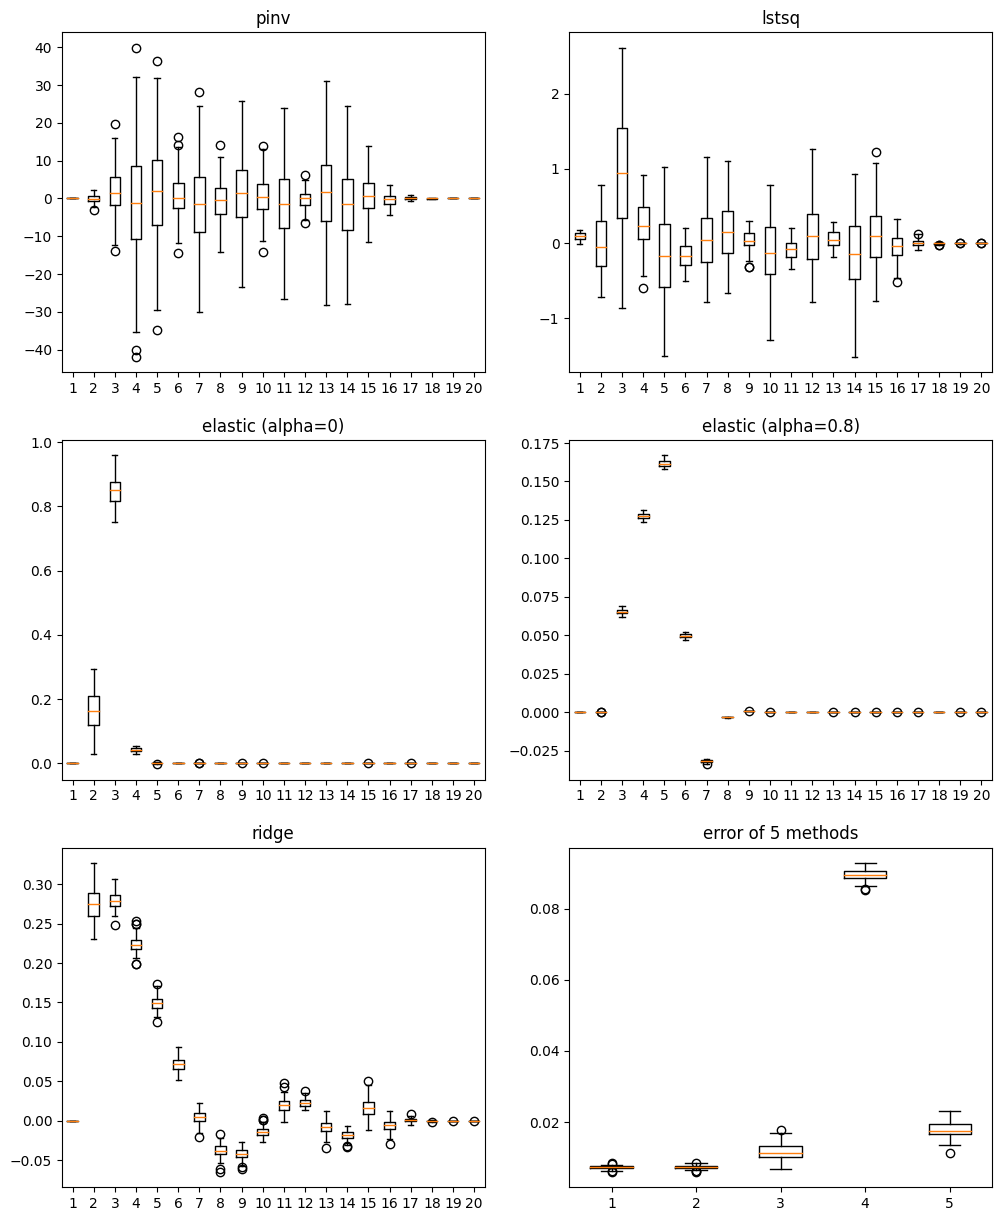

In [104]:
# plot (value of loading for 100 realization of noises)


plt.rcParams['figure.figsize'] = [12, 15]
rcParams.update({'font.size': 10})
fig,axs = plt.subplots(3,2)
axs = axs.reshape(-1)

axs[0].boxplot(A[0].T)
axs[0].set_title('pinv')
axs[1].boxplot(A[1].T)
axs[1].set_title('lstsq')
axs[2].boxplot(A[2].T)
axs[2].set_title('elastic (alpha=0)')
axs[3].boxplot(A[3].T)
axs[3].set_title('elastic (alpha=0.8)')
axs[4].boxplot(A[4].T)
axs[4].set_title('ridge')

axs[5].boxplot(E.T)
axs[5].set_title('error of 5 methods')


### Ex: Cross validation toy problem 

* In this example we use different models (with different order polynomials) to see the model performance (interpolation error and extrapolation error)

* As you can see, though the models with higher order minimize the interpolation error, they get worsen in extrapolating (for the data that the model was not used for training)

In [111]:
# cross validate [not the normal cross validate in ML, here we are trying to do extrapolation]

n = 200 
L = 8 
x = np.linspace(0,L,n)
x1 = x[:int(n/2)]
x2 = x[int(n/2):]
n1 = len(x1)
n2 = len(x2)

f_train = np.power(x1,2)   # train parabole x = [0,4]
f_test  = np.power(x2,2)   # test parabola x = [4,8]

M = 20                     # degree of polynomial 
k = 100                    # no of different noise realizations 
Eni = np.zeros((k,M))      # interpolation error matrix 
Ene = np.zeros((k,M))      # extrapolation error matrix 

for jj in range(M): 
    phi_i = np.zeros((n1,jj))    # the interpolation library of polynomials upto order jj <= M 
    phi_e = np.zeros((n2,jj))    # the extrapolation library of polynomials upto order jj <= M 

    # create polynomail library upto order JJ <=M 
    for j in range(jj):
        phi_i[:,j] = np.power(x1,j)
        phi_e[:,j] = np.power(x2,j)

    f = np.power(x,2)

    for j in range(k):
        fni = np.power(x1,2) + 0.1 * np.random.randn(n1) 
        fne = np.power(x2,2) + 0.1 * np.random.randn(n1)

        ani = np.linalg.pinv(phi_i) @ fni               # get the polynomial loading based on the training data
        fani = phi_i @ ani                              # predict the function in [0,4] using the training data 
        Eni[j,jj] = np.linalg.norm(f_train - fani,ord=2)/np.linalg.norm(f_train,ord=2)  # interpolation error 


        fane = phi_e @ ani                             # use the loading from trianing to extrapolation region 
        Ene[j,jj] = np.linalg.norm(f_test - fane,ord=2)/np.linalg.norm(f_test,ord=2)  # interpolation error 

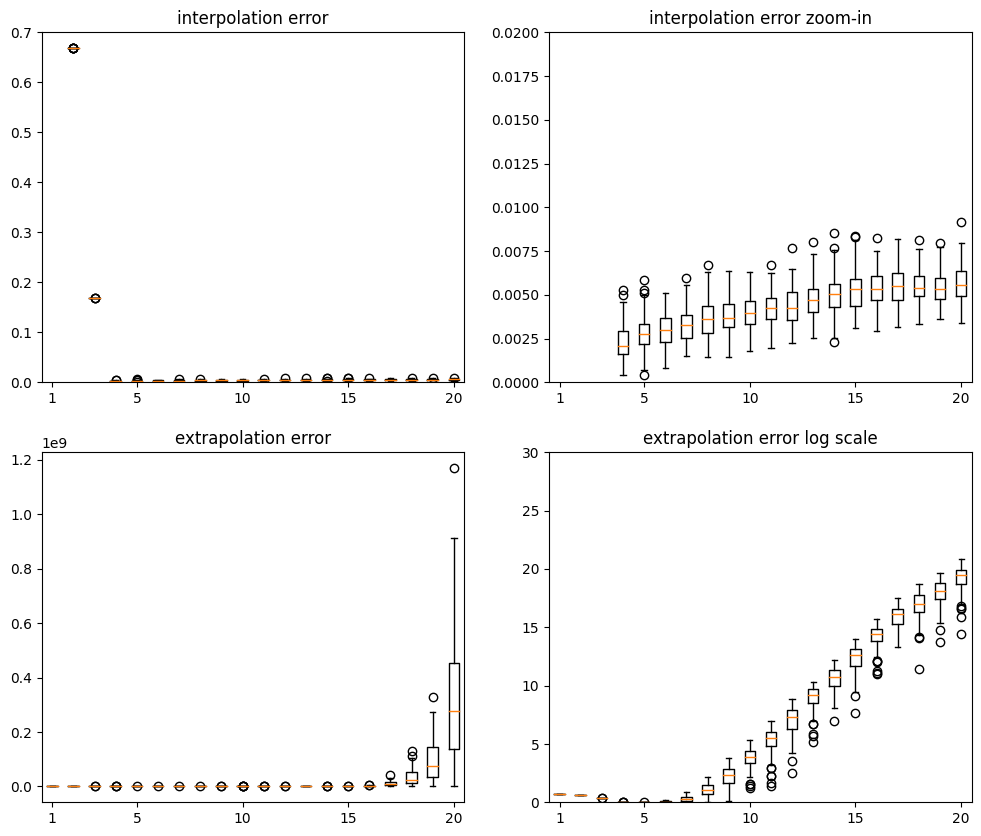

In [118]:
# plot 

plt.rcParams['figure.figsize'] = [12,10]
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].boxplot(Eni)
axs[0].set_ylim(0,0.7)
axs[0].set_title('interpolation error')
axs[1].boxplot(Eni)
axs[1].set_ylim(0,0.02)
axs[1].set_title('interpolation error zoom-in')
axs[2].boxplot(Ene)
axs[2].set_title('extrapolation error')
axs[3].boxplot(np.log(Ene+1))
axs[3].set_ylim(0,30)
axs[3].set_title('extrapolation error log scale')

for ax in axs:
    ax.set_xticks((1,5,10,15,20))
    ax.set_xticklabels((1,5,10,15,20))

plt.show()

### Model selection and cross validation 

* Most fundemental problem with regression is it is easy to overfit a model to data, thus leading to a model that is incapable of generalization for extrapolation 

* To overcome the consequances of overfitting, or more appropriatly select a parsomonious model with only few parameters, and thus balancing the error with a model that can more easily generalize, or interpolate

* There are two common mathemathical stratergies to overcome overfitting: 1. cross validation 2. computing the information criteria 

* Cross validation: Take random portion of the data and build a model. Do this k times and average the parameter scores (regression loadings) to produce the cross validated model. Then test the model against the witheld (extrapolation) data and evaluate the model is actually any good. 

### Ex: Toy example to show the cross validation for model selection 

* Here, we are using 3 different models (p-inverse, least square and lasso regression) to fit 20 degree polynomial to data 

* The the model parameters (or loading of polynomial terms) are averaged over 2,10 and 100 trials during the cross validation 

* The loading are converging to some constant value as we use more trials during the training, making the models more robust 

* Note that in this example we are not doing the model generalizability (as we evaluate the error using the test data only)

* Note that lasso regression provides more robust and parsimonious model (even with small number of training examples)



C:\Users\PPA25\AppData\Local\Temp\ipykernel_24984\1841078024.py:36: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr3.fit(phi, f)
c:\Users\PPA25\Desktop\Projects\.conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\PPA25\Desktop\Projects\.conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+00, tolerance: 2.345e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

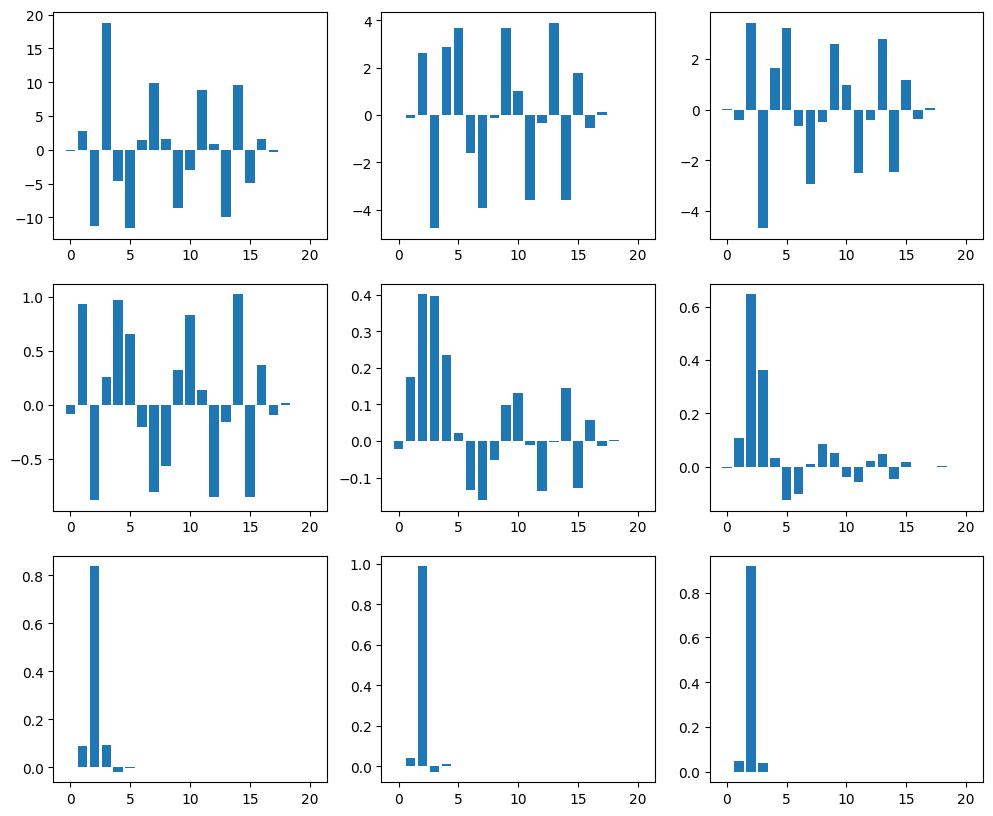

In [126]:
# Average the loadings over many trials(k=2,10,100)

n = 100
L = 4 
x = np.linspace(0,L,100)
f = np.power(x,2)            # parabola with 100 data points 

M =21                        # polynomial degree 
phi = np.zeros((n,M))        # polynomial library 
for j in range(M):
    phi[:,j] = np.power(x,j)

trials = np.array([2,10,100])  # no of trials (over which the loadings are averaged)

fig,axs = plt.subplots(3,3)

for j in range(len(trials)):
    trial = trials[j]
    E = np.zeros((3,trial))        # error matrix 
    A = np.zeros((3,M,trial))      # loading matrix 

    for jj in range(trial):
        f = np.power(x,2) + 0.2*np.random.randn(n)
        # p-inverse 
        a1 = np.linalg.pinv(phi) @ f 
        f1 = phi @ a1
        E[0,jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
        A[0,:,jj] = a1

        # least sq. 
        a2 = np.linalg.lstsq(np.copy(phi),np.copy(f),rcond=None)[0]
        f2 = phi @ a2 
        E[1,jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
        A[1,:,jj] = a2

        # lasso 
        regr3 = linear_model.ElasticNet(alpha=0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
        regr3.fit(phi, f)  
        a3 = regr3.coef_
        f3 = phi@ a2 
        E[2,jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
        A[2,:,jj] = a3

    a1_mean,a2_mean, a3_mean  = np.mean(A,axis=-1)

    axs[0,j].bar(range(M),a1_mean)
    axs[1,j].bar(range(M),a2_mean)
    axs[2,j].bar(range(M),a3_mean)
   

### Model selection: Information criteria 

* Kullback-Leibler(KL) divergence measures the distance between two probability density distributions (or data sets which represent the truth and the model) and KL divergence between two models $f(X,\beta)$ and $g(X,\mu)$ is defined as: 

$\hspace{1 cm} I(f,g) = \int f(X,\beta) log[\frac{f(X,\beta)}{g(X,\mu)}] dX$ 

* From the infromation theory perspective, the quantity $I(f,g)$ measures the information lost when $g$ is used to represent $f$ (Note that when  $f=g \Rightarrow I(f,g) =0$ and therfore no information is lost)

* When computing KL - divergence a model must be specified unlike in regression and cross-validation

* AIC and BIC scores: KL-divergence can't be computed in practice since it requires full knowledge of the statistics of the truth model $f(x)$ and of all parameters of in the proposed model $g(x)$. Thus Akaike proposed an alternative wat to estimate the KL divergence based on the log-liklihood fucntion at its maximum point.

$\hspace{1 cm} AIC = 2K - 2 log(L(\hat{\mu}|X))$, where K is the number of parameters used in the model

* BIC is almost identical to AIC aside from the penelization of the information criteria by the number of terms. 

$\hspace{1 cm} BIC = log(n)K - 2 log(L(\hat{\mu}|X))$, where n is the number of data points (or sample size)